### ANÁLISE DOS DADOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("sample_medicare.csv")

In [3]:
df.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
0,1750477758,RICHARDSON,FAZAL,GORMAN,IN,Optometry,S,HYDROCHLOROTHIAZIDE,CLOPIDOGREL BISULFATE,NaN,...,30.0,16800,1075.11,NaN,*,NaN,#,15.0,1140.0,NaN
1,1265604870,JOHNSON,PETER,FOUNTAIN VALLEY,IL,Nurse Practitioner,S,OXYCODONE HCL,GLIMEPIRIDE,NaN,...,12.0,3510,532.98,NaN,NaN,27.0,*,0.0,364.0,937.41
2,1295731255,MCMANMON,JONATHAN,POMPANO BEACH,IA,Family Practice,S,MECLIZINE HCL,GABAPENTIN,27.0,...,14.3,1440,485.72,NaN,#,46.0,NaN,38.0,NaN,0.00
3,1356337398,EAKES,KIRK,AUSTIN,VA,Nephrology,S,WARFARIN SODIUM,ZIPRASIDONE HCL,21.0,...,23.0,600,256.14,NaN,#,11.0,NaN,NaN,NaN,0.00
4,1265409056,WYNN,SARA,SMYRNA,OR,Physician Assistant,S,PAROXETINE HCL,VALPROIC ACID,NaN,...,112.0,1680,4013.17,NaN,*,14.0,#,88.9,NaN,NaN


In [4]:
df.dtypes

npi                                int64
nppes_provider_last_org_name      object
nppes_provider_first_name         object
nppes_provider_city               object
nppes_provider_state              object
specialty_description             object
description_flag                  object
drug_name                         object
generic_name                      object
bene_count                       float64
total_claim_count                  int64
total_30_day_fill_count          float64
total_day_supply                   int64
total_drug_cost                  float64
bene_count_ge65                  float64
bene_count_ge65_suppress_flag     object
total_claim_count_ge65           float64
ge65_suppress_flag                object
total_30_day_fill_count_ge65     float64
total_day_supply_ge65            float64
total_drug_cost_ge65             float64
dtype: object

In [5]:
df.isnull().sum(axis=0)

npi                                  0
nppes_provider_last_org_name         3
nppes_provider_first_name            2
nppes_provider_city                  0
nppes_provider_state                 0
specialty_description                0
description_flag                     0
drug_name                            0
generic_name                         0
bene_count                       61372
total_claim_count                    0
total_30_day_fill_count              0
total_day_supply                     0
total_drug_cost                      0
bene_count_ge65                  86087
bene_count_ge65_suppress_flag    13841
total_claim_count_ge65           42521
ge65_suppress_flag               57945
total_30_day_fill_count_ge65     42103
total_day_supply_ge65            42236
total_drug_cost_ge65             42339
dtype: int64

In [6]:
pd.DataFrame(df.isnull().sum(axis=0)).sort_values(by=0, ascending=False)/df.shape[0]

,0
bene_count_ge65,0.86087
bene_count,0.61372
ge65_suppress_flag,0.57945
total_claim_count_ge65,0.42521
total_drug_cost_ge65,0.42339
total_day_supply_ge65,0.42236
total_30_day_fill_count_ge65,0.42103
bene_count_ge65_suppress_flag,0.13841
nppes_provider_last_org_name,0.00003
nppes_provider_first_name,0.00002


In [7]:
df.describe(percentiles=[0.001, .01, .1, .25, .5, .75, .9, .99, .999])

,npi,bene_count,total_claim_count,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
count,1.000000e+05,38628.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,13913.000000,57479.000000,57897.000000,57764.000000,5.766100e+04
mean,1.498548e+09,28.713576,51.137660,74.597419,2109.676730,4.245201e+03,19.835118,48.060909,73.799373,2062.670591,3.465718e+03
std,2.880663e+08,27.706786,84.221171,129.506376,3929.466465,2.567230e+04,32.208941,94.803685,138.798766,3872.993071,2.243156e+04
min,1.003000e+09,11.000000,11.000000,11.000000,11.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
0.1%,1.003084e+09,11.000000,11.000000,11.000000,22.999000,2.555999e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1%,1.003999e+09,11.000000,11.000000,11.000000,68.000000,4.535980e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00
10%,1.104009e+09,12.000000,12.000000,13.000000,288.000000,1.204800e+02,0.000000,11.000000,11.000000,107.000000,5.459000e+01
25%,1.245488e+09,14.000000,15.000000,19.000000,449.000000,2.517975e+02,0.000000,13.000000,15.600000,390.000000,1.984100e+02
50%,1.497844e+09,20.000000,24.000000,34.000000,900.000000,6.761400e+02,13.000000,21.000000,31.000000,854.000000,5.987300e+02
75%,1.740577e+09,32.000000,51.000000,72.000000,2010.000000,2.363220e+03,24.000000,46.000000,69.000000,1950.000000,2.104990e+03


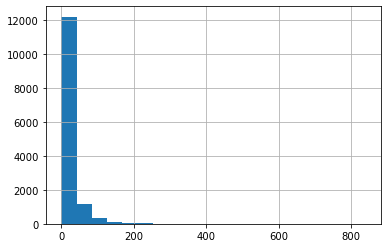

In [8]:
df["bene_count_ge65"].dropna().hist(bins=20)
plt.show()

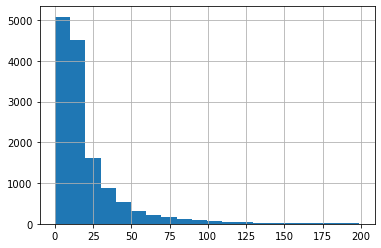

In [9]:
df.loc[df["bene_count_ge65"]<200, "bene_count_ge65"].dropna().hist(bins=20)
plt.show()

In [10]:
df["description_flag"].value_counts(dropna=False)

S    97586
T     2414
Name: description_flag, dtype: int64

In [11]:
df["ge65_suppress_flag"].value_counts(dropna=False)

NaN    57945
#      27365
*      14690
Name: ge65_suppress_flag, dtype: int64

<AxesSubplot:>

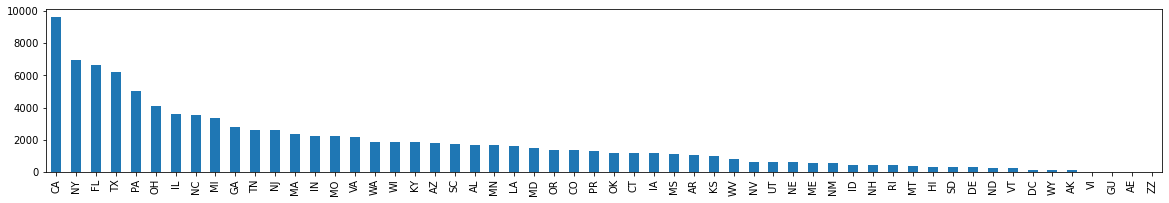

In [12]:
fig, axs = plt.subplots(figsize=(20,3))
df["nppes_provider_state"].value_counts(dropna=False).plot(kind="bar")

# ESTRUTURAÇÃO DOS DADOS

In [13]:
import pandas as pd
import numpy as np

In [14]:
data_consumo = {
    0: {"id": "xx1", "dt_consumo": "2020-11-03", "vl_consumo": 50},
    1: {"id": "xx1", "dt_consumo": "2020-11-15", "vl_consumo": 21},
    2: {"id": "xx2", "dt_consumo": "2020-11-18", "vl_consumo": 33},
    3: {"id": "xx2", "dt_consumo": "2020-12-16", "vl_consumo": 23},
    4: {"id": "xx3", "dt_consumo": "2020-11-06", "vl_consumo": 45},
    5: {"id": "xx4", "dt_consumo": "2020-12-18", "vl_consumo": 46},
    6: {"id": "xx4", "dt_consumo": "2020-11-18", "vl_consumo": 12},
    7: {"id": "xx4", "dt_consumo": "2020-11-04", "vl_consumo": 34},
}

In [15]:
data_id = {
    0: {"id": "xx1", "dt_compra": "2020-12-01", "flg_comprou": 1},
    1: {"id": "xx2", "dt_compra": "2020-12-15", "flg_comprou": 1},
    2: {"id": "xx3", "dt_compra": np.nan, "flg_comprou": 0},
    3: {"id": "xx4", "dt_compra": np.nan, "flg_comprou": 0}
}

In [16]:
df_consumo = pd.DataFrame.from_dict(data_consumo).transpose()
df_id = pd.DataFrame.from_dict(data_id).transpose()

In [17]:
df_consumo.head()

,id,dt_consumo,vl_consumo
0,xx1,2020-11-03,50
1,xx1,2020-11-15,21
2,xx2,2020-11-18,33
3,xx2,2020-12-16,23
4,xx3,2020-11-06,45


In [18]:
df_id.head()

,id,dt_compra,flg_comprou
0,xx1,2020-12-01,1
1,xx2,2020-12-15,1
2,xx3,NaN,0
3,xx4,NaN,0


In [19]:
df_merge = pd.merge(df_id, df_consumo, left_on="id", right_on="id", how="left")

In [20]:
df_merge

,id,dt_compra,flg_comprou,dt_consumo,vl_consumo
0,xx1,2020-12-01,1,2020-11-03,50
1,xx1,2020-12-01,1,2020-11-15,21
2,xx2,2020-12-15,1,2020-11-18,33
3,xx2,2020-12-15,1,2020-12-16,23
4,xx3,NaN,0,2020-11-06,45
5,xx4,NaN,0,2020-12-18,46
6,xx4,NaN,0,2020-11-18,12
7,xx4,NaN,0,2020-11-04,34


In [21]:
df_merge.loc[df_merge.dt_compra.isna(), "dt_compra"] = "2020-12-15"

In [22]:
df_merge

,id,dt_compra,flg_comprou,dt_consumo,vl_consumo
0,xx1,2020-12-01,1,2020-11-03,50
1,xx1,2020-12-01,1,2020-11-15,21
2,xx2,2020-12-15,1,2020-11-18,33
3,xx2,2020-12-15,1,2020-12-16,23
4,xx3,2020-12-15,0,2020-11-06,45
5,xx4,2020-12-15,0,2020-12-18,46
6,xx4,2020-12-15,0,2020-11-18,12
7,xx4,2020-12-15,0,2020-11-04,34


In [23]:
df_select = df_merge.loc[df_merge.dt_consumo < df_merge.dt_compra,:]

In [24]:
df_select

,id,dt_compra,flg_comprou,dt_consumo,vl_consumo
0,xx1,2020-12-01,1,2020-11-03,50
1,xx1,2020-12-01,1,2020-11-15,21
2,xx2,2020-12-15,1,2020-11-18,33
4,xx3,2020-12-15,0,2020-11-06,45
6,xx4,2020-12-15,0,2020-11-18,12
7,xx4,2020-12-15,0,2020-11-04,34


In [25]:
df_select[["id", "vl_consumo"]].groupby(by="id").sum()

,vl_consumo
id,
xx1,71
xx2,33
xx3,45
xx4,46


In [26]:
df_agg = df_select[['id', 'dt_consumo', 'vl_consumo']].groupby(by="id").agg({
    'dt_consumo': 'max',
    'vl_consumo': ['sum','min','max'],
    'id': 'count'
})

In [27]:
df_agg

dt_consumo vl_consumo            id
            max        sum min max count
id                                      
xx1  2020-11-15         71  21  50     2
xx2  2020-11-18         33  33  33     1
xx3  2020-11-06         45  45  45     1
xx4  2020-11-18         46  12  34     2

In [28]:
df_agg.columns = ['.'.join(col).strip() if col[1] != "" else col[0] for col in df_agg.columns.values]

In [29]:
df_agg

,dt_consumo.max,vl_consumo.sum,vl_consumo.min,vl_consumo.max,id.count
id,,,,,
xx1,2020-11-15,71,21,50,2
xx2,2020-11-18,33,33,33,1
xx3,2020-11-06,45,45,45,1
xx4,2020-11-18,46,12,34,2


# PIVOT TABLES

In [30]:
import pandas as pd
import numpy as np

In [31]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo", "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two", "one", "one", "two", "two"], 
                   "C": ["small", "large", "large", "small", "small", "large", "small", "small", "large"], 
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7], 
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})

In [32]:
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [33]:
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                    columns=['C'], aggfunc=np.sum)

In [34]:
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [35]:
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                    columns=['C'], aggfunc=np.sum, fill_value=0)

In [36]:
table

C        large  small
A   B                
bar one      4      5
    two      7      6
foo one      4      1
    two      0      6

In [37]:
table = pd.pivot_table(df, values=['D', 'E'], index=['A', 'B'],
                    aggfunc={'D': np.sum,
                             'E': [min, max, np.mean]})

In [38]:
table

D    E               
        sum  max      mean  min
A   B                          
bar one   9  8.0  7.000000  6.0
    two  13  9.0  9.000000  9.0
foo one   5  5.0  3.666667  2.0
    two   6  6.0  5.500000  5.0

# ONE-HOT ENCODING

In [39]:
df = pd.DataFrame({'animal': ['dog', 'cat', 'dog'], 'sexo': ['macho', 'femea', 'femea'],
                   'idade': [1, 2, 3]})

In [40]:
df

,animal,sexo,idade
0,dog,macho,1
1,cat,femea,2
2,dog,femea,3


In [41]:
pd.get_dummies(df, prefix=['animal', 'sexo'], drop_first=True)

,idade,animal_dog,sexo_macho
0,1,1,1
1,2,0,0
2,3,1,0


# CAT CODES

In [42]:
for col in ['animal', 'sexo']:
    df[col] = df[col].astype('category')

cat_columns = df.select_dtypes(['category']).columns

map_categ_cols = {}
for col in cat_columns:
    map_categ_cols[col] = dict( enumerate(df[col].cat.categories) )
print(map_categ_cols)

df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

{'animal': {0: 'cat', 1: 'dog'}, 'sexo': {0: 'femea', 1: 'macho'}}


In [43]:
df

,animal,sexo,idade
0,1,1,1
1,0,0,2
2,1,0,3


# TRATAMENTO DE NULOS

In [44]:
import pandas as pd
import numpy as np

In [45]:
df = pd.DataFrame([(0.0, np.nan, -1.0, 1.0),
                   (np.nan, 2.0, np.nan, np.nan),
                   (2.0, 3.0, np.nan, 9.0),
                   (np.nan, 4.0, -4.0, 16.0)],
                  columns=list('abcd'))
df

,a,b,c,d
0,0.0,NaN,-1.0,1.0
1,NaN,2.0,NaN,NaN
2,2.0,3.0,NaN,9.0
3,NaN,4.0,-4.0,16.0


### FILL VALUE 

In [46]:
fill_value = df.b.median() 
df["b"] = df["b"].fillna(fill_value)

In [47]:
df

,a,b,c,d
0,0.0,3.0,-1.0,1.0
1,NaN,2.0,NaN,NaN
2,2.0,3.0,NaN,9.0
3,NaN,4.0,-4.0,16.0


### DROP

In [48]:
df.dropna(subset=["a"])

,a,b,c,d
0,0.0,3.0,-1.0,1.0
2,2.0,3.0,NaN,9.0


### INTERPOLATE

In [49]:
df.interpolate(method='linear', limit_direction='forward', axis=0)

,a,b,c,d
0,0.0,3.0,-1.0,1.0
1,1.0,2.0,-2.0,5.0
2,2.0,3.0,-3.0,9.0
3,2.0,4.0,-4.0,16.0


### FORWARD / BACKWARD FILLING

In [50]:
df

,a,b,c,d
0,0.0,3.0,-1.0,1.0
1,NaN,2.0,NaN,NaN
2,2.0,3.0,NaN,9.0
3,NaN,4.0,-4.0,16.0


In [51]:
# method={'backfill', 'bfill', 'pad', 'ffill'}
df.fillna(method='ffill')

,a,b,c,d
0,0.0,3.0,-1.0,1.0
1,0.0,2.0,-1.0,1.0
2,2.0,3.0,-1.0,9.0
3,2.0,4.0,-4.0,16.0


### Count / Frequency Mapping 

#### Count

In [52]:
df = pd.DataFrame({'animal': ['dog', 'cat', 'dog'], 'sexo': ['macho', 'femea', 'femea'],
                   'idade': [1, 2, 3]})

In [53]:
df

,animal,sexo,idade
0,dog,macho,1
1,cat,femea,2
2,dog,femea,3


In [54]:
df["animal"].value_counts()

dog    2
cat    1
Name: animal, dtype: int64

In [55]:
# loop to find the different count of categories in a dict and apply them to the variable
# in train and test set.
for variable in ['animal', 'sexo']:
    count_map = df[variable].value_counts().to_dict()
    df[variable] = df[variable].map(lambda x: count_map[x])

In [56]:
df

,animal,sexo,idade
0,2,1,1
1,1,2,2
2,2,2,3


#### Frequency

In [57]:
# loop to find the different count of categories in a dict and apply them to the variable
# in train and test set.
for variable in ['animal', 'sexo']:
    count_map = df[variable].value_counts().to_dict()
    var_sum = df[variable].shape[0]
    df[variable] = df[variable].map(lambda x: count_map[x])/var_sum

In [58]:
df

,animal,sexo,idade
0,0.666667,0.333333,1
1,0.333333,0.666667,2
2,0.666667,0.666667,3


# OUTLIERS

In [59]:
import random 
df = pd.DataFrame([random.gauss(0, sigma=1) for i in range(5000)],columns=["value"])
df.loc[df.sample(10).index,"value"] += 3
df.loc[df.sample(10).index,"value"] -= 3

In [60]:
df

,value
0,0.771878
1,0.732124
2,-0.536093
3,0.272211
4,-1.297955
...,...
4995,0.646594
4996,-0.187881
4997,-0.100883
4998,-0.079989


In [61]:
Q1=df['value'].quantile(0.25)
Q3=df['value'].quantile(0.75)
IQR=Q3-Q1
print("Q1", Q1)
print("Q3", Q3)
print("IQR", IQR)
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("Normal Range", lower_bound, "-", upper_bound)

Q1 -0.6510219050104004
Q3 0.6782184079643532
IQR 1.3292403129747536
Normal Range -2.6448823744725307 - 2.6720788774264834


In [62]:
df['value'].describe(percentiles=[0.01,0.1,0.25,0.50,0.75,0.90,0.99])

count    5000.000000
mean        0.015025
std         1.014455
min        -4.558855
1%         -2.345543
10%        -1.290088
25%        -0.651022
50%         0.026355
75%         0.678218
90%         1.302584
99%         2.374860
max         4.479574
Name: value, dtype: float64

<AxesSubplot:xlabel='value'>

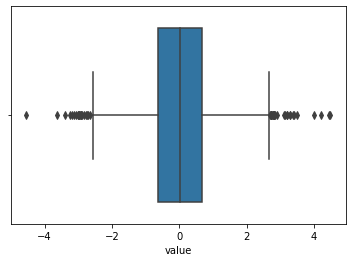

In [63]:
import seaborn as sns
sns.boxplot(data=df,x=df['value'])

In [64]:
from scipy import stats
z=np.abs(stats.zscore(df.value))
print(z)

[0.74614283 0.70695181 0.54331883 ... 0.114268   0.09366885 0.02364046]


In [65]:
df[(df.value<df.value.mean()-3*df.value.std()) | (df.value>df.value.mean()+3*df.value.std())].shape

(20, 1)

In [66]:
df[z>3].shape

(20, 1)

In [67]:
new_df = df[z<3]
new_df.shape

(4980, 1)

In [68]:
lower_bound = df.value.mean()-3*df.value.std()
upper_bound = df.value.mean()+3*df.value.std()
df[df.value<lower_bound] = lower_bound
df[(df.value>upper_bound)] = upper_bound

In [69]:
df.describe()

,value
count,5000.000000
mean,0.014269
std,1.007576
min,-3.028341
25%,-0.651022
50%,0.026355
75%,0.678218
max,3.058391


# TRATAMENTO DE DATAS

In [70]:
df = pd.DataFrame({'dt_compra': {0: '26/1/2016', 1: '5/11/2016'}})

In [71]:
df

,dt_compra
0,26/1/2016
1,5/11/2016


In [72]:
pd.to_datetime(df['dt_compra'].astype(str), format='%d/%m/%Y')

0   2016-01-26
1   2016-11-05
Name: dt_compra, dtype: datetime64[ns]

In [73]:
df = pd.DataFrame({'dt_compra': {0: '26/1/16', 1: '5/11/16'}, 'dt_venda': {0: '26/2/16', 1: '9/11/16'}})

In [74]:
df

,dt_compra,dt_venda
0,26/1/16,26/2/16
1,5/11/16,9/11/16


In [75]:
df['dt_compra'] = pd.to_datetime(df['dt_compra'].astype(str), format='%d/%m/%y')

In [76]:
df['dt_venda'] = pd.to_datetime(df['dt_venda'].astype(str), format='%d/%m/%y')

In [77]:
df['qt_dias_dif'] = (df.dt_venda - df.dt_compra)

In [78]:
df['qt_dias_dif']

0   31 days
1    4 days
Name: qt_dias_dif, dtype: timedelta64[ns]

In [79]:
df['qt_dias_dif'].map(lambda x: x.components.days)

0    31
1     4
Name: qt_dias_dif, dtype: int64

# ROLLING FILTERS

In [80]:
import sklearn.datasets
df = sklearn.datasets.load_boston()

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

In [81]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [82]:
df = pd.DataFrame(sklearn.datasets.load_boston()['target'], columns=["value"])

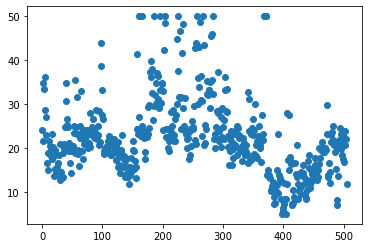

In [83]:
import matplotlib.pyplot as plt

plt.scatter(x=df.index,y=df["value"])
plt.show()

In [84]:
df["less_noise_value"] = df.value.rolling(window=5).mean()

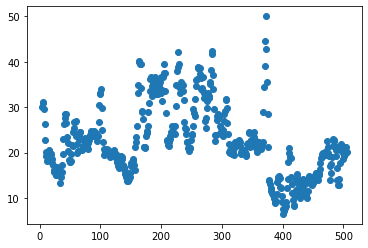

In [85]:
import matplotlib.pyplot as plt

plt.scatter(x=df.index,y=df["less_noise_value"])
plt.show()

In [86]:
df["less_noise_value"] = df.value.rolling(window=20).median()

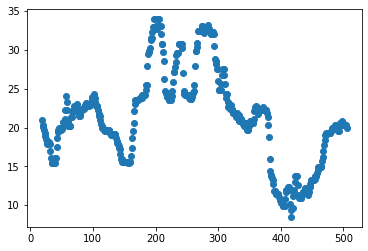

In [87]:
import matplotlib.pyplot as plt

plt.scatter(x=df.index,y=df["less_noise_value"])
plt.show()

# ENRIQUECIMENTO DOS DADOS

## OPERAÇÕES MATEMÁTICAS: UNIVARIADO

### Square-root / Log

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer

# load your data
data = pd.read_csv("StatewiseTestingDetails.csv")
data.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [89]:
data.Negative = data.Negative.map(lambda x: int(x) if not pd.isnull(x) and x!=" " else np.nan)

In [90]:
data.describe()

,TotalSamples,Negative,Positive
count,1.633600e+04,6.968000e+03,5.662000e+03
mean,5.376466e+06,1.868881e+06,5.652654e+04
std,8.780338e+06,3.498175e+06,1.673108e+05
min,5.800000e+01,0.000000e+00,0.000000e+00
25%,1.729098e+05,7.639150e+04,5.362500e+02
50%,9.307580e+05,4.221375e+05,4.771000e+03
75%,7.284795e+06,2.071205e+06,3.361875e+04
max,6.789786e+07,8.356103e+07,1.638961e+06


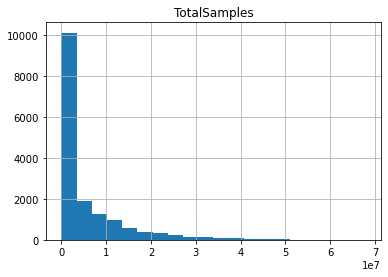

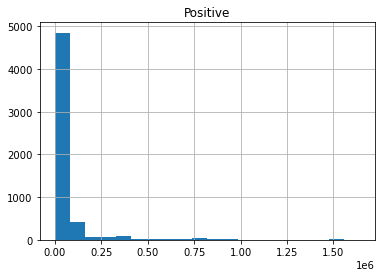

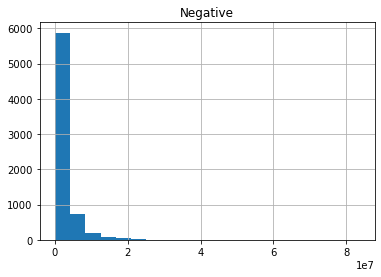

In [91]:
for col in ['TotalSamples','Positive', 'Negative']:
    data[[col]].dropna().hist(bins=20)
    plt.show()

In [92]:
# create columns variables to hold the columns that need transformation
cols = ['TotalSamples']

# create the function transformer object with logarithm transformation
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)

# apply the transformation to your data
for col in cols:
    data['{}_sqrt'.format(col)] = sqrt_transformer.transform(data[cols])

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


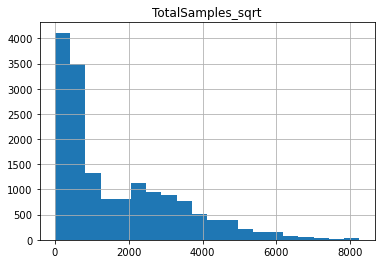

In [93]:
for col in ['TotalSamples_sqrt']:
    data[[col]].hist(bins=20)

In [94]:
# create columns variables to hold the columns that need transformation
cols = ['TotalSamples']

# create the function transformer object with logarithm transformation
logarithm_transformer = FunctionTransformer(np.log, validate=True)

# apply the transformation to your data
for col in cols:
    data['{}_log'.format(col)] = logarithm_transformer.transform(data[cols])

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


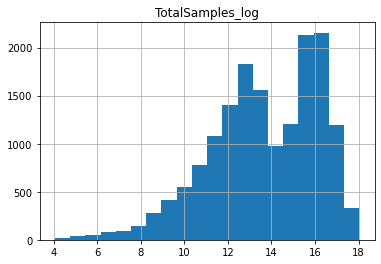

In [95]:
for col in ['TotalSamples_log']:
    data[[col]].hist(bins=20)

### Box-Cox Transformation

In [96]:
# import the needed packages.
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

In [97]:
# create the power transformer object with method 'box-cox'
boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)

# apply the transformation to your data
for col in cols:
    data['{}_box-cox'.format(col)] = boxcox_transformer.fit_transform(data[cols])

In [98]:
boxcox_transformer.lambdas_

array([0.10964081])

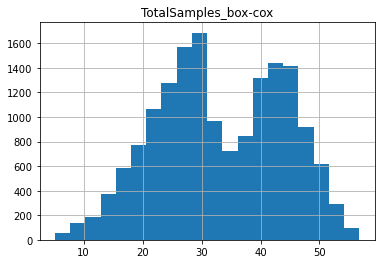

In [99]:
for col in ['TotalSamples_box-cox']:
    data[[col]].hist(bins=20)

### Inverso 

In [100]:
cols = ['TotalSamples']

# create the function transformer object with reciprocal transformation
reciprocal_transformer = FunctionTransformer(np.reciprocal, validate=True)

# apply the transformation to your data
for col in cols:
    data['{}_inverse'.format(col)] = reciprocal_transformer.fit_transform(data[cols])

In [101]:
data['TotalSamples'].describe()

count    1.633600e+04
mean     5.376466e+06
std      8.780338e+06
min      5.800000e+01
25%      1.729098e+05
50%      9.307580e+05
75%      7.284795e+06
max      6.789786e+07
Name: TotalSamples, dtype: float64

In [102]:
data['TotalSamples_inverse'].describe()

count    1.633600e+04
mean     5.930037e-05
std      5.311622e-04
min      1.472801e-08
25%      1.372722e-07
50%      1.074393e-06
75%      5.783365e-06
max      1.724138e-02
Name: TotalSamples_inverse, dtype: float64

## OPERAÇÕES MATEMÁTICAS: BIVARIADO

### Somas e Diferenças

In [103]:
data['dif_positive'] = data.Positive - data.Positive.mean()

In [104]:
data.Positive.describe()

count    5.662000e+03
mean     5.652654e+04
std      1.673108e+05
min      0.000000e+00
25%      5.362500e+02
50%      4.771000e+03
75%      3.361875e+04
max      1.638961e+06
Name: Positive, dtype: float64

In [105]:
data[['dif_positive']].describe()

,dif_positive
count,5.662000e+03
mean,-1.387536e-09
std,1.673108e+05
min,-5.652654e+04
25%,-5.599029e+04
50%,-5.175554e+04
75%,-2.290779e+04
max,1.582434e+06


### Multiplicação / Divisão

In [106]:
data['pc_negative']=data.Negative / data.TotalSamples
data['pc_positive']=data.Positive / data.TotalSamples

array([[<AxesSubplot:title={'center':'pc_positive'}>]], dtype=object)

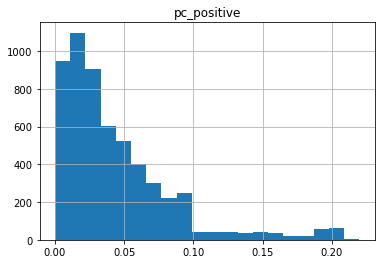

In [107]:
data[['pc_positive']].hist(bins=20)

In [108]:
data['pc_negative'].describe()

count    6968.000000
mean        0.926264
std         0.120189
min         0.000000
25%         0.909006
50%         0.936812
75%         0.961270
max         9.659089
Name: pc_negative, dtype: float64

## DISCRETIZAÇÃO

### Equal-Width

In [109]:
# import the libraries
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

# load your data
data = pd.read_csv("StatewiseTestingDetails.csv")

In [110]:
data

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
16331,2021-08-06,West Bengal,15999961.0,NaN,NaN
16332,2021-08-07,West Bengal,16045662.0,NaN,NaN
16333,2021-08-08,West Bengal,16092192.0,NaN,NaN
16334,2021-08-09,West Bengal,16122345.0,NaN,NaN


In [111]:
# create the discretizer object with strategy uniform and 8 bins
discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='uniform') 

# fit the discretizer to the train set
discretizer.fit(data[["TotalSamples"]].values)

# apply the discretisation
data["TotalSamples_Group"] = discretizer.transform(data[["TotalSamples"]].values)

In [112]:
data["TotalSamples_Group"].value_counts()

0.0    12703
1.0     2124
2.0      857
3.0      323
4.0      195
5.0       67
7.0       35
6.0       32
Name: TotalSamples_Group, dtype: int64

### Equal-frequency

In [113]:
# create the discretizer object with strategy uniform and 8 bins
discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile') 

# fit the discretizer to the train set
discretizer.fit(data[["TotalSamples"]].values)

# apply the discretisation
data["TotalSamples_Group"] = discretizer.transform(data[["TotalSamples"]].values)

In [114]:
data["TotalSamples_Group"].value_counts()

0.0    2042
6.0    2042
5.0    2042
4.0    2042
7.0    2042
1.0    2042
2.0    2042
3.0    2042
Name: TotalSamples_Group, dtype: int64

## OPERAÇÕES DE TEXTO

In [115]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Guilherme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [116]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Guilherme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [117]:
from nltk.tokenize import word_tokenize

sentence = "Eu estou estudando ciência de dados na Dinânima há 2 meses, estou amando!!!"
word_tokens = word_tokenize(sentence)
print(word_tokens)

['Eu', 'estou', 'estudando', 'ciência', 'de', 'dados', 'na', 'Dinânima', 'há', '2', 'meses', ',', 'estou', 'amando', '!', '!', '!']


In [118]:
from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer('portuguese')
print(snowball_stemmer.stem('estudando'))
print(snowball_stemmer.stem('estudar'))
print(snowball_stemmer.stem('estudei'))

estud
estud
estud


In [119]:
[snowball_stemmer.stem(x) for x in word_tokens]

['eu',
 'estou',
 'estud',
 'ciênc',
 'de',
 'dad',
 'na',
 'dinânim',
 'há',
 '2',
 'mes',
 ',',
 'estou',
 'amand',
 '!',
 '!',
 '!']

In [120]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [121]:
new_words= [word for word in word_tokens if word not in string.punctuation]
new_words

['Eu',
 'estou',
 'estudando',
 'ciência',
 'de',
 'dados',
 'na',
 'Dinânima',
 'há',
 '2',
 'meses',
 'estou',
 'amando']

In [122]:
new_words= [word for word in word_tokens if word not in string.punctuation+"0123456789"]
new_words

['Eu',
 'estou',
 'estudando',
 'ciência',
 'de',
 'dados',
 'na',
 'Dinânima',
 'há',
 'meses',
 'estou',
 'amando']

In [123]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
print(stopwords.words('portuguese'))

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [124]:
new_words = [x.lower() for x in new_words]

In [125]:
new_words

['eu',
 'estou',
 'estudando',
 'ciência',
 'de',
 'dados',
 'na',
 'dinânima',
 'há',
 'meses',
 'estou',
 'amando']

In [126]:
clean_tokens = new_words[:] 
for token in clean_tokens:
    if token in stopwords.words('portuguese'):
        clean_tokens.remove(token)

print(clean_tokens)

['estudando', 'ciência', 'dados', 'dinânima', 'meses', 'estou', 'amando']


# PRODUTIZAÇÃO

In [127]:
import pandas as pd
import numpy as np

In [128]:
df = pd.DataFrame([(0.0, np.nan, -1.0, 1.0),
                   (np.nan, 2.0, np.nan, np.nan),
                   (2.0, 3.0, np.nan, 9.0),
                   (np.nan, 4.0, -4.0, 16.0)],
                  columns=list('abcd'))

In [129]:
df.b = df.b.fillna(0)

In [130]:
df.d = df.d.fillna(df.d.mean())

In [131]:
def treat_na_fill(df, select_columns, fill_values):
  for col in select_columns:
    df[col] = df[col].fillna(fill_values[col])
  return df

In [132]:
df.head()

,a,b,c,d
0,0.0,0.0,-1.0,1.000000
1,NaN,2.0,NaN,8.666667
2,2.0,3.0,NaN,9.000000
3,NaN,4.0,-4.0,16.000000


In [133]:
df = treat_na_fill(df, ['b', 'd'], {'b': 0, 'd': df.d.mean()})

In [134]:
def treat_na_drop(df, select_columns):
  for col in select_columns:
    df = df.drop(col, axis=1)
  return df

In [135]:
df = treat_na_drop(df, ['a', 'c'])

In [136]:
df.head()

,b,d
0,0.0,1.000000
1,2.0,8.666667
2,3.0,9.000000
3,4.0,16.000000


In [137]:
assert df.dropna().shape[0] == df.shape[0]

In [138]:
df = pd.DataFrame([(0.0, np.nan, -1.0, 1.0),
                   (np.nan, 2.0, np.nan, np.nan),
                   (2.0, 3.0, np.nan, 9.0),
                   (np.nan, 4.0, -4.0, 16.0)],
                  columns=list('abcd'))

In [139]:
df.pipe(treat_na_fill, ['b', 'd'], {'b': 0, 'd': df.d.mean()}
        ).pipe(treat_na_drop, ['a', 'c'])

,b,d
0,0.0,1.000000
1,2.0,8.666667
2,3.0,9.000000
3,4.0,16.000000
